In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file = 'Resources/charity_data.csv'
df = pd.read_csv(file)
df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

# Cleaning and Preprocessing

In [3]:
# separating target feature from data
X = df.drop(['NAME', 'EIN'], axis=1)
y = df['IS_SUCCESSFUL']


In [4]:
# checking number of unique values for categorical variables only
for i in X:
    
    if type(X[i][0]) == str:
        print(f'column: {i}')
        print(f'unique values: {X[i].unique()}')
        print(f' # of unique: {X[i].nunique()}')
        print('------------')   

column: APPLICATION_TYPE
unique values: ['T10' 'T3' 'T5' 'T7' 'T4' 'T6' 'T2' 'T9' 'T19' 'T8' 'T13' 'T12' 'T29'
 'T25' 'T14' 'T17' 'T15']
 # of unique: 17
------------
column: AFFILIATION
unique values: ['Independent' 'CompanySponsored' 'Family/Parent' 'National' 'Regional'
 'Other']
 # of unique: 6
------------
column: CLASSIFICATION
unique values: ['C1000' 'C2000' 'C3000' 'C1200' 'C2700' 'C7000' 'C7200' 'C1700' 'C4000'
 'C7100' 'C2800' 'C6000' 'C2100' 'C1238' 'C5000' 'C7120' 'C1800' 'C4100'
 'C1400' 'C1270' 'C2300' 'C8200' 'C1500' 'C7210' 'C1300' 'C1230' 'C1280'
 'C1240' 'C2710' 'C2561' 'C1250' 'C8000' 'C1245' 'C1260' 'C1235' 'C1720'
 'C1257' 'C4500' 'C2400' 'C8210' 'C1600' 'C1278' 'C1237' 'C4120' 'C2170'
 'C1728' 'C1732' 'C2380' 'C1283' 'C1570' 'C2500' 'C1267' 'C3700' 'C1580'
 'C2570' 'C1256' 'C1236' 'C1234' 'C1246' 'C2190' 'C4200' 'C0' 'C3200'
 'C5200' 'C1370' 'C2600' 'C1248' 'C6100' 'C1820' 'C1900' 'C2150']
 # of unique: 71
------------
column: USE_CASE
unique values: ['ProductDev'

<AxesSubplot:>

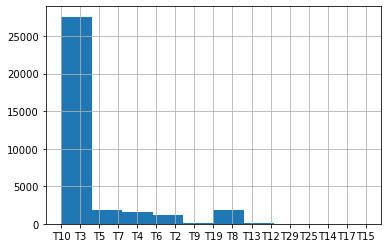

In [5]:
# Application type histogram

X['APPLICATION_TYPE'].hist()

In [6]:
application_counts = X.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Binning application by values
app = []

for i in X['APPLICATION_TYPE']:
    if i == 'T3':
        value = 1
    else:
        value = 0
    app.append(value)
    
X['application_bin'] = app
X
        

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  application_bin  
0                  1                0  
1                  1                1  
2                  0                0  
3                  1                1  
4                  1                1  
...              ...              ...  
34294              0                0  
34295              0                0  
34296              0                1  
34297              1                0  
34298              0                1  

[34299 rows x 11 columns]

<AxesSubplot:>

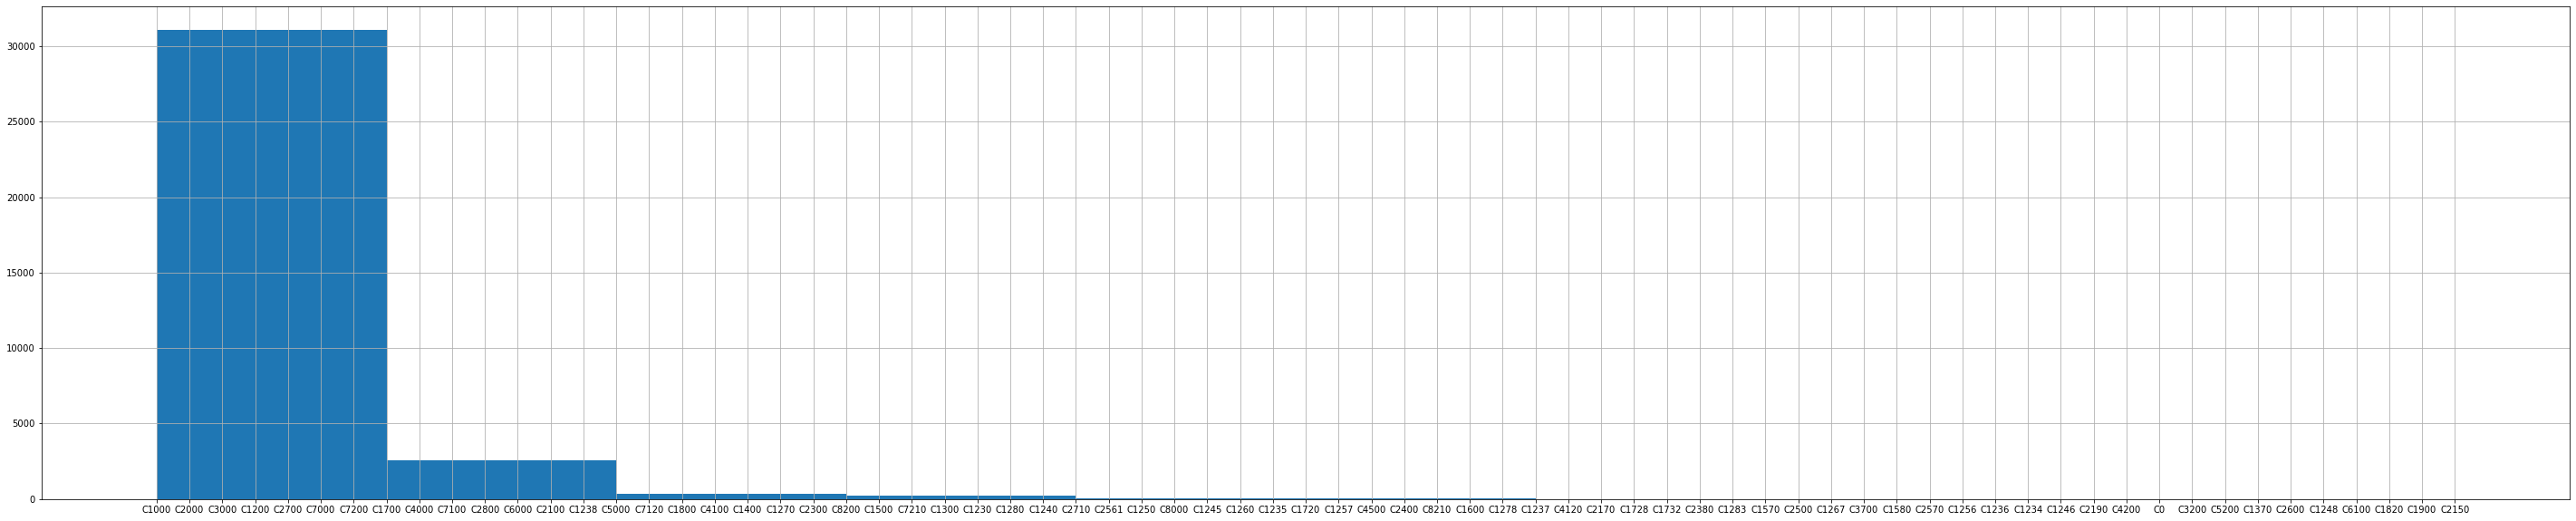

In [8]:
# Classification histogram
X['CLASSIFICATION'].hist(figsize=(50,10))

In [9]:
classification_counts = X.CLASSIFICATION.value_counts()
classification_counts.head(71)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# binning by classification
classif = []

for i in X['APPLICATION_TYPE']:
    if i == 'C1000' or 'C2000' or 'C3000' or 'C2700' or 'C7000' or 'C72000' or 'C1700':
        value = 1
    else:
        value = 0
    classif.append(value)
    
X['classification_bin'] = classif
X

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  application_bin  classification_bin  
0                  1                0                   1  
1                  1                1                   1  
2                  0                0                   1  
3                  1                1                   1  
4                  1                1                   1  
...              ...              ...                 ...  
34294              0                0                   1  
34295              0                0                   1  
34296              0                1                   1  
34297              1                0                   1  
34298              0                1                   1  

[34299 rows x 12 columns]

In [11]:
# dopping APPLICATION_TYPE and CLASSIFICATION
X = X.drop(['APPLICATION_TYPE', 'CLASSIFICATION'], axis=1)
X

AFFILIATION      USE_CASE  ORGANIZATION  STATUS     INCOME_AMT  \
0           Independent    ProductDev   Association       1              0   
1           Independent  Preservation  Co-operative       1         1-9999   
2      CompanySponsored    ProductDev   Association       1              0   
3      CompanySponsored  Preservation         Trust       1    10000-24999   
4           Independent     Heathcare         Trust       1  100000-499999   
...                 ...           ...           ...     ...            ...   
34294       Independent    ProductDev   Association       1              0   
34295  CompanySponsored    ProductDev   Association       1              0   
34296  CompanySponsored  Preservation   Association       1              0   
34297       Independent    ProductDev   Association       1              0   
34298       Independent  Preservation  Co-operative       1          1M-5M   

      SPECIAL_CONSIDERATIONS   ASK_AMT  IS_SUCCESSFUL  application_bin  \
0                          N      5000              1                0   
1                          N    108590              1                1   
2                          N      5000              0                0   
3                          N      6692              1                1   
4                          N    142590              1                1   
...                      ...       ...            ...              ...   
34294                      N      5000              0                0   
34295                      N      5000              0                0   
34296                      N      5000              0                1   
34297                      N      5000              1                0   
34298                      N  36500179              0                1   

       classification_bin  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
34294                   1  
34295                   1  
34296                   1  
34297                   1  
34298                   1  

[34299 rows x 10 columns]

In [13]:
# encoding categorical variable with pd.get_dummies
X = pd.get_dummies(X, columns=['AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'], drop_first=False)

In [19]:
# Scaling Data
import sklearn as skl
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_scaler = skl.preprocessing.StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Modeling